# FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

### Load the dataset

In [2]:
# Load the data
df = pd.read_csv('foodhub_order.csv')

# Overview
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### Number of rows and columns present in the data

In [ ]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns present in the data.')

There are 1898 rows and 9 columns present in the data.


#### Observations:

Using the `.shape` method, we can see that there are 1,898 rows, which corresponds to the number of orders by customers. There are 9 columns/attributes in the dataset.

### Datatypes of the different columns in the dataset.

In [4]:
# Use .dtypes to print a concise datatypes of the DataFrame
print(df.dtypes)

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


In [ ]:
# Using info() to print a concise summary of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


In [19]:
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

#### Observations:
- As seen earlier, each columns has a total entries of 1898, where columns have 1898 non-null entries, indicating no missing values.
- `restaurant_name`, `cuisine_type`, `day_of_the_week`, and `rating` are categorical columns.
- `order_id`, `customer_id`, `cost_of_the_order`, `food_preparation_time`, and `delivery_time` are numeric.

### Any missing values in the data? 

In [7]:
# Checking for missing values
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

This confirms that there are no missing values in any of the columns in the dataset.

### Statistical summary of the data

In [8]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
- **food_preparation_time**: The avegrage time (in minutes) it takes for food to be prepared once an order is place is 27 minutes. The preparation time ranges from 20 to 35 minutes, with 50% of orders taking between 23 and 31 minutes to prepare.
- **delivery_time**: The average delivery time (in minutes) it takes for to be delivered once picked up is approximately 24 minutes. Delivery times range from 15 to 33 minutes, with 50% of orders being delivered between 20 and 28 minutes.
- **cost_of_the_order**: The average cost of an order is approximately $16.50. The standard deviation is around $7.48, indicating moderate variability in order costs. The cost ranges from a minimum of $4.47 to a maximum of $35.41, with 50% of orders costing between $12.08 and $22.30.

### How many orders are not rated?

In [9]:
# Count the occurrences of each rating
rating_counts = df['rating'].value_counts()

# Calculate the percentage for each rating
rating_percentages = (rating_counts / len(df)) * 100

# Combine counts and percentages into a DataFrame
rating_summary = pd.DataFrame({
    'Count': rating_counts,
    'Percentage': rating_percentages
})

# Display the rating summary
print(rating_summary)

           Count  Percentage
rating                      
Not given    736   38.777661
5            588   30.979979
4            386   20.337197
3            188    9.905163


#### Observations:
- There are **736** orders in the dataset that are not rated. This is a notable portion of the data that lacks customer feedback on the service. That is, out of 1898 order, about 39% of the orders were not rated.
- `5-star ratings` (588 orders) and `4-star ratings` (386 orders) together account for 51.7% of the total orders. This indicates that a substantial proportion of customers who provided feedback are satisfied with their orders.

---

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Let's explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

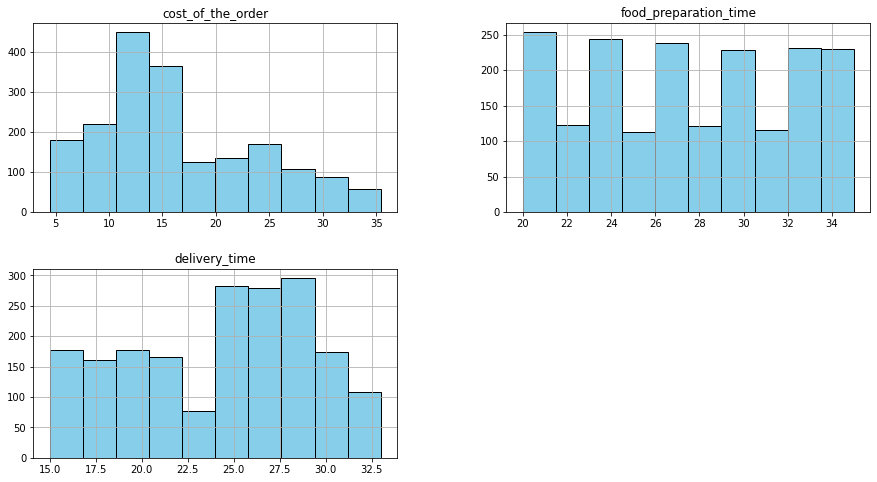

In [10]:
# Histogram illustrations for numeric columns
# Variables: cost of order, food preparation time and delivery time

_ = df.hist(['cost_of_the_order','food_preparation_time','delivery_time'],figsize=(15,8),color='skyblue',edgecolor='black')

**Observations**:
- Most customers order foof around the cost of 10 to 15 dollars.
- Most food preparation time is like 20mins.
- Most food deleivery when picked up is about 28 to 30mins long.

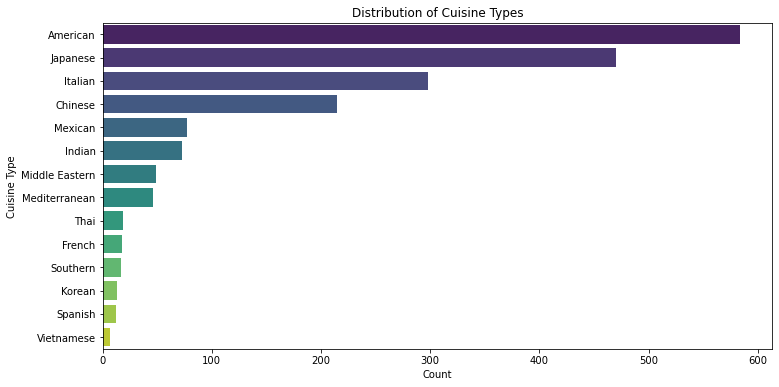

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


In [11]:
# Variable: Cuisine Type
cuisine_counts = df['cuisine_type'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(y=cuisine_counts.index, x=cuisine_counts.values, palette='viridis')
plt.title('Distribution of Cuisine Types')
plt.ylabel('Cuisine Type')
plt.xlabel('Count')

plt.show()
print(cuisine_counts)



**Observations**:

- American cuisine is the most common, with 584 occurrences, followed by Japanese cuisine with 470, and then Italian and Chinese cuisines with 298 and 215 occurrences, respectively. Notably, there is a significant drop-off in frequency after these top four cuisines.
- In total, the dataset includes 14 distinct cuisine types.


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64


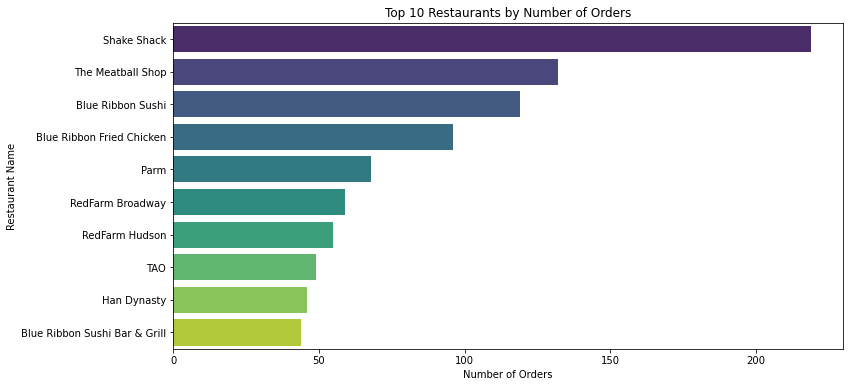

In [12]:
# Variable: Restaurant Name
restaurant_counts = df['restaurant_name'].value_counts()
print(restaurant_counts)
# Display the top 10 restaurants
top_10_restaurants = restaurant_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_restaurants.index, x=top_10_restaurants.values, palette='viridis')
plt.title('Top 10 Restaurants by Number of Orders')
plt.ylabel('Restaurant Name')
plt.xlabel('Number of Orders')
plt.show()



**Observations**
- This dataset contains a frequency count of restaurant names, with 178 restaurants. Shake Shack is by far the most common restaurant people order from, or might be a popular chain with multiple locations in the area.
- Food type is often incorporated (e.g., Sushi, Fried Chicken, Meatball).

In [21]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

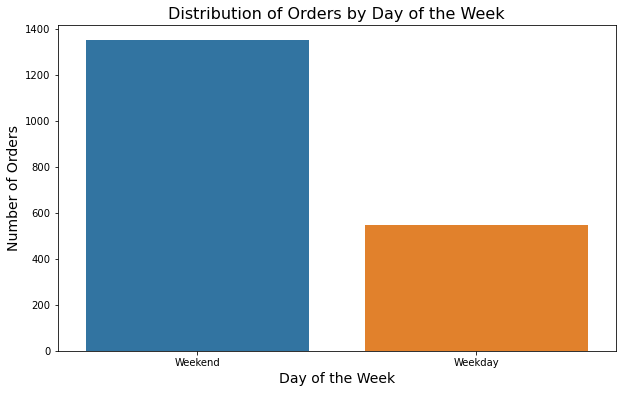

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64


In [13]:
# Variable: Day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='day_of_the_week')
plt.xlabel("Day of the Week",fontsize=14)
plt.ylabel("Number of Orders", fontsize=14)
plt.title('Distribution of Orders by Day of the Week', fontsize=16)
plt.show()
print(df['day_of_the_week'].value_counts())

Most people prefer to order food on weekends, reflecting a significant trend in consumer behavior.

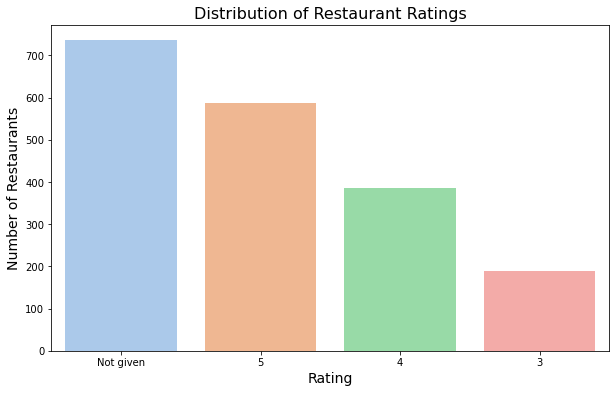

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [14]:
# Variable: Rating
rating_counts = df['rating'].value_counts().sort_values(ascending=False)
# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='pastel')
plt.title('Distribution of Restaurant Ratings', fontsize=16)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.xlabel('Rating', fontsize=14)
plt.show()
df['rating'].value_counts()

**Observations**:
- The high number of "Not given" ratings could suggest that many customers either do not feel compelled to leave a rating or that the restaurants may not be actively encouraging feedback.
- The significant number of high ratings (5 and 4 stars) indicates that many customers are satisfied with their dining experiences.

In [15]:
# Variable: Custormer Id: Convert to a categorical datatype
df['customer_id'].value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

**Observation**: 
- We have above the frequency of orders made by different customers, with 1,200 unique customer IDs.
- The customer with ID 52832 has the highest number of orders, totaling 13.
- This also has long tail where most customers only placed a single order.

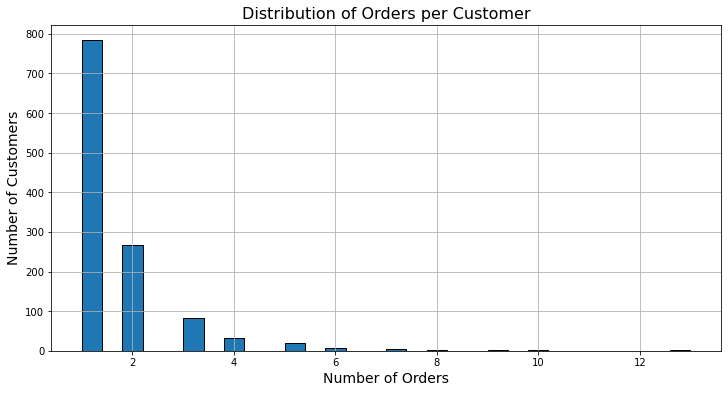

In [16]:
# Count the frequency of each customer_id
customer_order_counts = df['customer_id'].value_counts()

# Create the histogram
plt.figure(figsize=(12, 6))
customer_order_counts.hist(bins=30, edgecolor='black')
plt.title('Distribution of Orders per Customer', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.show()

**Observations**:
- Approximately **800 customers** have placed only **one order**.
- Around **280 customers** have placed **two orders**.
- There are very few customers who have placed **more than two orders**.

In [17]:
# Display the top 10 customers by number of orders
print("\nTop 10 customers by number of orders:")
print(customer_order_counts.head(10))


Top 10 customers by number of orders:
customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
Name: count, dtype: int64


In [18]:
# Variable: Order ID
total=df['order_id'].value_counts().sum()
print(f'As observed ealier we have {total} orders in the dataset.')

As observed ealier we have 1898 orders in the dataset.


---

### Which are the top 5 restaurants in terms of the number of orders received?

In [19]:
# Group by restaurant name and count the number of orders
restaurant_order_counts = df['restaurant_name'].value_counts()

# Get the top 5 restaurants
top_5_restaurants = restaurant_order_counts.head()

# Display the results
print("Top 5 restaurants by number of orders:")
print(top_5_restaurants)

Top 5 restaurants by number of orders:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:

Shake Shack is the most popular restaurant with 219 orders.

----


### Which is the most popular cuisine on weekends?

In [20]:
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
top_10_weekend_cuisine = weekend_orders['cuisine_type'].value_counts()
print('Top 10 Cuisine on Weekend')
top_10_weekend_cuisine.head(10)

Top 10 Cuisine on Weekend


cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Name: count, dtype: int64

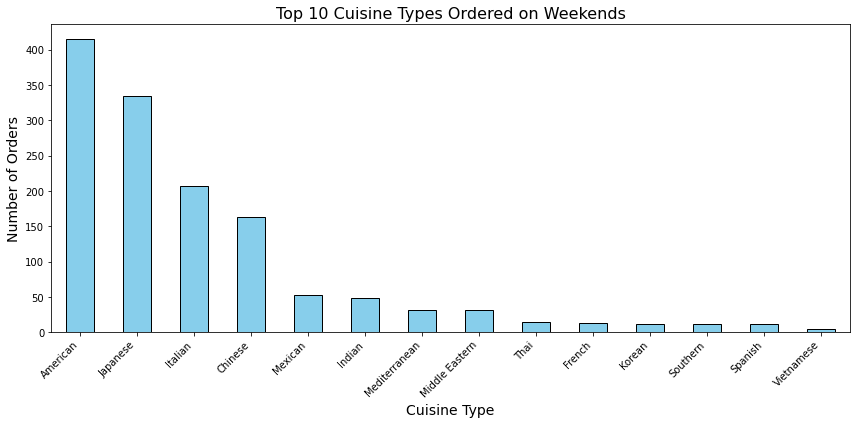

In [21]:
plt.figure(figsize=(12, 6))
top_10_weekend_cuisine.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Top 10 Cuisine Types Ordered on Weekends', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

#### Observations:
- **American cuisine** is the most popular on weekends, with 415 orders. This suggests a strong preference for American food among customers during weekends.
- There is a significant drop-off in the number of orders after the top four cuisines (American, Japanese, Italian, and Chinese).

---


### What percentage of the orders cost more than 20 dollars?

In [22]:
orders_20 = df[df['cost_of_the_order'] > 20].shape[0]
total_orders = df.shape[0]
percentage_20 = (orders_20 / total_orders) * 100
print(f"Percentage of orders costing more than $20: {percentage_20:.2f}%")

Percentage of orders costing more than $20: 29.24%


#### Observations:
- This means that nearly 3 out of every 10 orders are in the higher price range.
- Also, we can deduce that the majority of orders (70.76%) cost $20 or less. This suggests that most customers prefer more affordable meals or smaller orders.

---


### Multivariate Analysis

### Let's Perform a multivariate analysis to explore relationships between the important variables in the dataset

**A. Food Preparation Time by Cuisine Type**

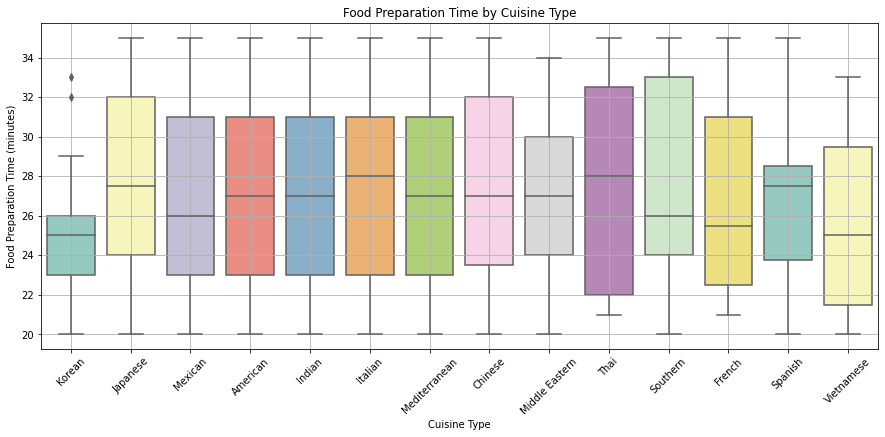

In [25]:
# Food Preparation Time by Cuisine Type
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', palette='Set3')
plt.title('Food Preparation Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- This shows the range and distribution of food preparation times for different cuisines, indicating if certain cuisines have longer preparation times.
- Italian and Thai cuisines have the longest median preparation time at 28 minutes.
- Korean and Vietnamese cuisines have the shortest median preparation times at 25 minutes.

In [26]:
# Calculate the median food preparation time for each cuisine type
cuisine_median_prep_time = df.groupby('cuisine_type')['food_preparation_time'].median().sort_values(ascending=False)
print('Food Preparation median Time:')
cuisine_median_prep_time

Food Preparation median Time:


cuisine_type
Italian           28.0
Thai              28.0
Japanese          27.5
Spanish           27.5
American          27.0
Chinese           27.0
Indian            27.0
Mediterranean     27.0
Middle Eastern    27.0
Mexican           26.0
Southern          26.0
French            25.5
Korean            25.0
Vietnamese        25.0
Name: food_preparation_time, dtype: float64

**B. Distribution of Cost of Order by Cuisine Type**

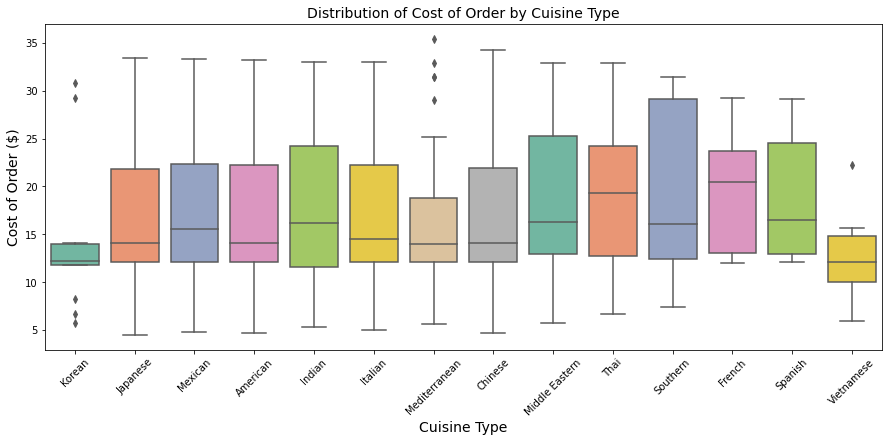

In [27]:
# Distribution of Cost of Order by Cuisine Type
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', palette='Set2')
plt.title('Distribution of Cost of Order by Cuisine Type', fontsize = 14)
plt.xlabel('Cuisine Type',fontsize = 14)
plt.ylabel('Cost of Order ($)',fontsize = 14)
plt.xticks(rotation=45)
plt.show()

In [28]:
# Aggregating the average cost and delivery time by cuisine type and day of the week
heatmap_data = df.groupby(['cuisine_type', 'day_of_the_week']).agg({
    'cost_of_the_order': 'mean',
    'delivery_time': 'mean'
}).reset_index()

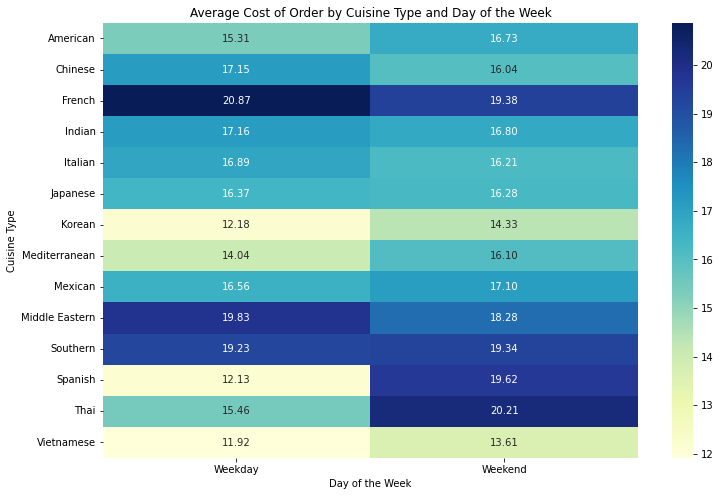

In [29]:
# Pivot table for the average cost of order
heatmap_pivot_cost = heatmap_data.pivot(index='cuisine_type', columns='day_of_the_week', values='cost_of_the_order')

# Heatmap for Average Cost of Order
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot_cost, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Average Cost of Order by Cuisine Type and Day of the Week')
plt.ylabel('Cuisine Type')
plt.xlabel('Day of the Week')
plt.show()

**Observations**:
- **French Cuisine**: This cuisine generally has the highest average cost of orders, both on weekdays and weekends, compared to others.
- **Korean and Vietnamese**: These cuisines have the lowest average costs, indicating that they might be more affordable options.
- On weekends, the average cost of orders for most cuisines tends to be slightly higher than on weekdays, possibly indicating that customers are more willing to spend more on dining out during weekends.

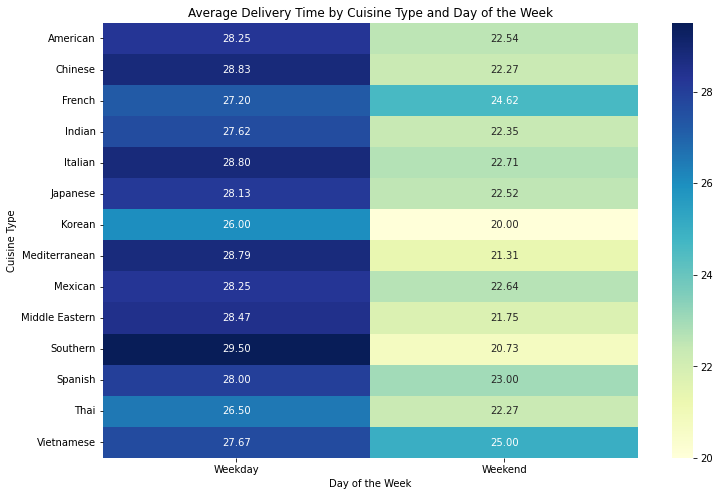

In [30]:
# Pivot table for the average delivery time
heatmap_pivot_delivery = heatmap_data.pivot(index='cuisine_type', columns='day_of_the_week', values='delivery_time')

# Heatmap for Average Delivery Time
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot_delivery, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Average Delivery Time by Cuisine Type and Day of the Week')
plt.ylabel('Cuisine Type')
plt.xlabel('Day of the Week')
plt.show()

**Observations**:
- **Southern Cuisine**: This cuisine has the longest average delivery time on weekdays, indicating either higher preparation times or more complex orders.
- **Korean Cuisine**: On weekends, it shows the shortest delivery time, suggesting efficiency in service or simpler menu items.
- In general, delivery times are longer during weekdays compared to weekends for most cuisines. This could be due to higher demand or traffic conditions affecting delivery efficiency.


**C. Distribution of Cost of Order by Top 10 Restaurants**


In [31]:
# Find the top 10 restaurants based on the number of orders
top_10_restaurants = df['restaurant_name'].value_counts().head(10).index.tolist()
# DataFrame for the top 10 restaurants
top_10_df = df[df['restaurant_name'].isin(top_10_restaurants)]

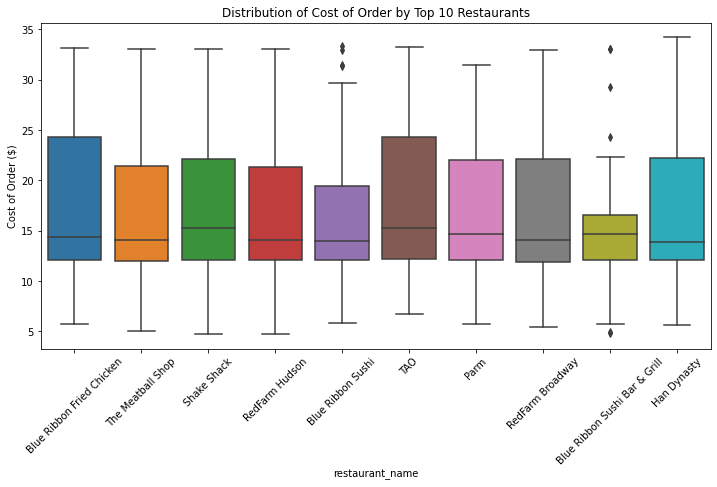

In [32]:
# Distribution of 'cost_of_the_order' by top 10 restaurants
plt.figure(figsize=(12, 6))
sns.boxplot(x='restaurant_name', y='cost_of_the_order', data=top_10_df)
plt.xticks(rotation=45)
plt.title('Distribution of Cost of Order by Top 10 Restaurants')
plt.ylabel('Cost of Order ($)')
plt.show()


**D. Correlation Matrix**

In [33]:
# Convert rating to numeric (ignoring "Not given" for simplicity)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

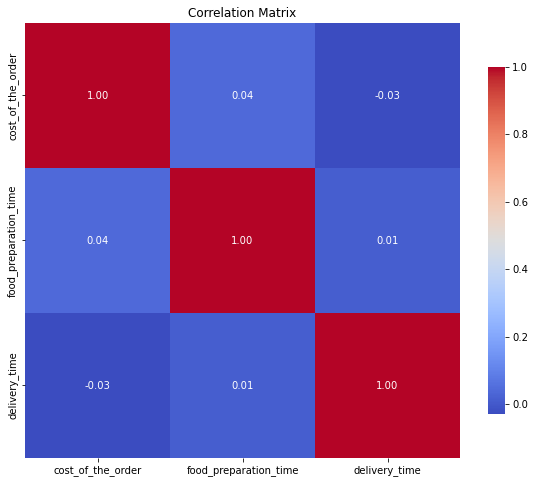

,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


In [34]:
# Correlation matrix
numeric_columns = ['cost_of_the_order','food_preparation_time','delivery_time']
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()
correlation_matrix

---

#### Observations:
- The total net revenue generated by the company is $6,166.30


### What is if the company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Number of orders that takes more than 60 minutes to get delivered from the time the order is placed
deliver_60 = df[df['delivery_time'] + df['food_preparation_time'] >60].shape[0]

# Total number of order
total_orders =  df.shape[0]

# Percentage of orders that takes more than 60 minutes to get delivered from the time the order is placed
percentage_60 = (deliver_60 / total_orders) * 100
print(f"Percentage of orders taking more than 60 minutes: {percentage_60:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:
- The percentage of orders taking more than 60 minutes to get delivered from the time the order is placed (i.e., the time food is prepared and then delivered) is 10.54%.


### Let's analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [38]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

**Observations**:
- There's a significant difference of about 5.87 minutes between weekday and weekend delivery times.
- Deliveries on weekdays take longer on average compared to weekends.
- This could be due to various factors such as traffic conditions, restaurant busyness, or staffing levels.


### Conclusion and Recommendations


#### What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
* **Cuisine Preferences**:
    *  American, Japanese, Italian, and Chinese cuisines are the most popular, especially on weekends.
    *  French cuisine has the highest average cost, while Korean and Vietnamese are the most affordable.
*  **Customer Satisfaction and Ratings**: 
    - High customer satisfaction is evident from the ratings, with a significant portion of orders receiving 4 and 5 stars. However, a notable percentage of orders (38.78%) do not have ratings, indicating an opportunity to gather more comprehensive feedback.
* **Delivery Times**:
    * There is a significant difference in delivery times between weekdays and weekends, with weekdays taking longer on average.
    * 10.54% of orders take more than 60 minutes, indicating room for improvement in delivery efficiency. 
* **Top Restaurants**:
    * Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken are among the top restaurants by order count and ratings.

### Recommendations:

*  **Targeted Marketing and Promotions**: 
    * Promoting high-rated restaurants like The Meatball Shop and Shake Shack can significantly enhance marketing efforts and drive customer engagement.
    * Introducing weekend-specific promotions for popular cuisines like American, Japanese, Italian, and Chinese. Offering combo deals or family meal packs can attract more customers.

* **Enhance Customer Feedback Collection**:
    * Offering discounts or loyalty points for customers who provide ratings and feedback. This will help gather more comprehensive data on customer satisfaction.
    * Implementing follow-up surveys for orders without ratings to understand customer experiences and areas for improvement.

* **Menu and Pricing Strategies**
    * Value Meals for Affordable Cuisines, i.e., promote Korean and Vietnamese cuisines as affordable options. 
    *  Also, offer value meals or combo deals to attract budget-conscious customers.
    * In addition, maintain premium pricing for French cuisine but consider occasional promotions to attract a wider audience.


---